<a href="https://colab.research.google.com/github/Rushikesh-pawar/Assignment/blob/main/Do_basic_analysis_using_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#import libraries
import sys
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import sklearn
import pandas
import numpy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
import pandas as pd
import numpy as np

# load the dataset of restaurant data
df = pd.read_csv('swiggy888.csv')


In [73]:
df['Description']

0       A traditional south Indian dessert made with ...
1       Served with sambar and chutney. No soda, arti...
2       Served with sambar and chutney. No soda, arti...
3       Served with chutney. No soda, artificial colo...
4       [medium size] served with only chutney. No so...
                             ...                        
592                                                     
593                                                     
594                                                     
595                                                     
596                                                     
Name: Description, Length: 597, dtype: object

In [95]:
# # fill the NA values with fillna
df = df.fillna(method = 'ffill')

In [96]:
desc=df['Description']
print(desc)

0       A traditional south Indian dessert made with ...
1       Served with sambar and chutney. No soda, arti...
2       Served with sambar and chutney. No soda, arti...
3       Served with chutney. No soda, artificial colo...
4       [medium size] served with only chutney. No so...
                             ...                        
592                                                     
593                                                     
594                                                     
595                                                     
596                                                     
Name: Description, Length: 597, dtype: object


In [97]:
# Remove punctuation
processed = desc.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'\s+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [98]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed)

0       a traditional south indian dessert made with ...
1       served with sambar and chutney no soda artifi...
2       served with sambar and chutney no soda artifi...
3       served with chutney no soda artificial colour...
4       medium size served with only chutney no soda ...
                             ...                        
592                                                     
593                                                     
594                                                     
595                                                     
596                                                     
Name: Description, Length: 597, dtype: object


In [99]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [100]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'1': 35,
          '2': 12,
          '200': 8,
          '250': 3,
          '2pc': 3,
          '2pcs': 9,
          '3': 10,
          '3pcs': 4,
          '4': 11,
          '41': 1,
          '8': 5,
          '9pc': 1,
          'absolutely': 1,
          'accompanied': 3,
          'add': 3,
          'ajinomoto': 10,
          'along': 7,
          'aloo': 19,
          'appetizing': 4,
          'artificial': 35,
          'asking': 1,
          'balances': 1,
          'base': 15,
          'based': 1,
          'bath': 1,
          'best': 4,
          'biryani': 2,
          'boondi': 1,
          'bowl': 2,
          'box': 1,
          'butter': 3,
          'buttermilk': 12,
          'cauliflower': 1,
          'chapati': 2,
          'chef': 1,
          'chemical': 25,
          'chemicals': 10,
          'chillies': 7,
          'choice': 9,
          'choose': 13,
          'chucks': 1,
          'chutney': 25,
          'classic': 7,
          'coconut': 

In [101]:
# print the total number of words and the1 most common word
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(1)))

Number of words: 221
Most common words: [('served', 62)]


In [102]:
df.sort_values('Item Category', inplace=True)
df.reset_index(inplace=True, drop=True)
sum(list(df[df['Item Category']=='Recommended']['Price']))/len(list(df[df['Item Category']=='Recommended']['Price']))

198.70514285714262

In [103]:
price_dict={}
for i in list(set(df['Item Category'])):
  temp = list(df[df['Item Category']==i]['Price'])
  price_dict[i]=round(sum(temp)/len(temp),2)

### Compare the average price of each category in data

In [104]:
price_dict

{'Accompaniments': 51.0,
 'Bakery': 184.32,
 'Breads and Rice': 79.0,
 'Chat': 90.47,
 'Chat Specialties': 84.5,
 'Chinese Starter': 213.59,
 'Coffee Powder': 71.43,
 'Cold Beverages': 103.0,
 'Combos': 288.0,
 'Continental': 81.0,
 'Curries': 167.2,
 'Dahi Items': 94.0,
 'Desserts': 58.0,
 'Dosa Varieties': 104.44,
 'Dry & Gravy': 214.78,
 'Festival Season Special': 154.0,
 'Fresh Juice': 98.06,
 'Fried Rice': 194.8,
 'Hot Beverages': 195.5,
 'Idly Varieties': 54.0,
 'Lunch': 129.67,
 'Lunch Special': 84.0,
 'Meals for 1 person': 199.0,
 'Meals for 2 person(1+1 Thalis)': 291.22,
 'Milk Shakes': 106.41,
 'Mini Meals': 155.0,
 'Noodles': 189.64,
 'North Indian Combos': 201.0,
 'Packed - Savouries': 130.55,
 'Pav Bhaji': 106.67,
 'Pickles': 213.17,
 'Pizzas': 144.0,
 'Recommeded': 145.82,
 'Recommended': 198.71,
 'Rice': 228.4,
 'Rice Bowl for 1 person': 209.0,
 'Rice Mixes': 207.36,
 'Sandwich': 99.83,
 'Savouries - Cashew Items': 264.51,
 'Soups': 130.86,
 'South Indian': 115.5,
 'Spec

### Visualization

In [81]:
import matplotlib.pyplot as plt

In [93]:
x = df['Dish_name'].head(15)
y = df['Price'].head(15)

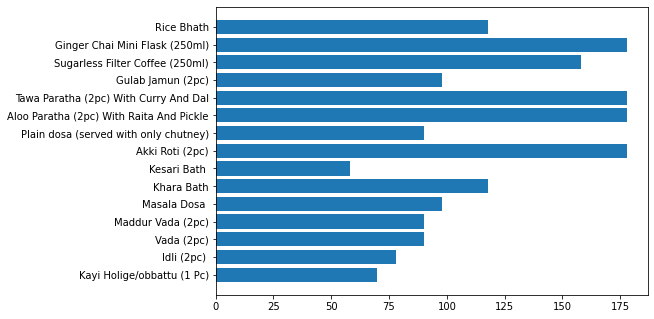

In [94]:
# Horizontal Bar Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x, y)
 
# Show Plot
plt.show()

Q7: Ask if we add image urls, and have images -> Now to find out whether the image is related to the item name -> what will be your approach

Ans:

We will do custom object detection on the image dataset. We will extract main words from item name and give those words as lables to image data set and train a model to predict what the image is.